In [330]:
import pandas as pd
import numpy as np
from functools import reduce
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt

In [ ]:
# !pip install matplotlib

9965.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 KB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.7 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/home/nick/transportation/venv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
df = pd.read_excel('../data/Svodniy_otchet_po_chasam_intensivnost+skorost_01_01_2024_31_12_2024.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Дата,Общая интенсивность автомобилей,NaN,NaN,Легковые (до 6 м),NaN,NaN,Малые груз. (6-9 м),NaN,NaN,...,Автобусы,NaN,NaN,Мотоциклы,NaN,NaN,"Скорость, км/ч",NaN,"Загрузка, %",NaN
1,NaN,Итого,Прямое,Обратное,Итого,Прямое,Обратное,Итого,Прямое,Обратное,...,Итого,Прямое,Обратное,Итого,Прямое,Обратное,Прямое,Обратное,Прямое,Обратное
2,А-146 Краснодар - Новороссийск - Верхнебаканский,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,км 32+000 а/д А-146 Краснодар-Верхнебаканский,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01.01.2024 00:59:59,122,57,65,112,51,61,4,2,2,...,0,0,0,0,0,0,71,83,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,31.12.2024 22:59:59,258,128,130,241,116,125,7,4,3,...,0,0,0,0,0,0,73,83,1,1
8774,31.12.2024 23:59:59,101,54,47,96,52,44,4,1,3,...,0,0,0,0,0,0,0,20,1,1
8775,Итого,12421324,NaN,NaN,9593909,NaN,NaN,659066,NaN,NaN,...,68238,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
8776,Среднее,1416,NaN,NaN,1094,NaN,NaN,75,NaN,NaN,...,8,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
title = df.iloc[3]['Unnamed: 0']
title

'км 32+000 а/д А-146 Краснодар-Верхнебаканский '

In [6]:
df = df.drop([2,3])
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Дата,Общая интенсивность автомобилей,NaN,NaN,Легковые (до 6 м),NaN,NaN,Малые груз. (6-9 м),NaN,NaN,...,Автобусы,NaN,NaN,Мотоциклы,NaN,NaN,"Скорость, км/ч",NaN,"Загрузка, %",NaN
1,NaN,Итого,Прямое,Обратное,Итого,Прямое,Обратное,Итого,Прямое,Обратное,...,Итого,Прямое,Обратное,Итого,Прямое,Обратное,Прямое,Обратное,Прямое,Обратное
4,01.01.2024 00:59:59,122,57,65,112,51,61,4,2,2,...,0,0,0,0,0,0,71,83,1,1
5,01.01.2024 01:59:59,261,127,134,252,122,130,5,2,3,...,0,0,0,0,0,0,65,85,1,1
6,01.01.2024 02:59:59,167,61,106,164,59,105,2,1,1,...,0,0,0,0,0,0,48,79,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,31.12.2024 22:59:59,258,128,130,241,116,125,7,4,3,...,0,0,0,0,0,0,73,83,1,1
8774,31.12.2024 23:59:59,101,54,47,96,52,44,4,1,3,...,0,0,0,0,0,0,0,20,1,1
8775,Итого,12421324,NaN,NaN,9593909,NaN,NaN,659066,NaN,NaN,...,68238,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
8776,Среднее,1416,NaN,NaN,1094,NaN,NaN,75,NaN,NaN,...,8,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_groups = {}
current_group = df.iloc[0].values[0]
for index, value in zip(df.iloc[0].index, df.iloc[0].values):
    if (pd.isna(value)):
        data_groups[current_group].append(index)
    else:
        current_group = value
        data_groups[current_group] = [index]

data_groups

{'Дата': ['Unnamed: 0'],
 'Общая интенсивность автомобилей': ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'],
 'Легковые (до 6 м)': ['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
 'Малые груз. (6-9 м)': ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
 'Грузовые (9-13 м)': ['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
 'Груз. большие (13-22 м)': ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
 'Автопоезда (22-30 м)': ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
 'Автобусы': ['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
 'Мотоциклы': ['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
 'Скорость, км/ч': ['Unnamed: 25', 'Unnamed: 26'],
 'Загрузка, %': ['Unnamed: 27', 'Unnamed: 28']}

In [ ]:
data_dfs = []
index = pd.to_datetime(df['Unnamed: 0'][2:-3], format='mixed')

for group, cols in zip(list(data_groups.keys())[1:], list(data_groups.values())[1:]):
    data_test_col = df[cols].copy()
    data_test_col.columns = data_test_col.iloc[1].values
    data_test_col = data_test_col.drop([0, 1])[:-3]
    data_df = data_df.set_index(index)
    data_df.index.names = ['timestamp']
    data_dfs.append((group, data_df))

In [139]:
test = data_dfs[0][1]
test

,Итого,Прямое,Обратное
timestamp,,,
2024-01-01 00:59:59,122,57,65
2024-01-01 01:59:59,261,127,134
2024-01-01 02:59:59,167,61,106
2024-01-01 03:59:59,132,59,73
2024-01-01 04:59:59,92,50,42
...,...,...,...
2024-12-31 19:59:59,660,376,284
2024-12-31 20:59:59,490,278,212
2024-12-31 21:59:59,372,186,186


In [163]:
title = 'Обратное'
test_col = test[title]
test_col

timestamp
2024-01-01 00:59:59     65
2024-01-01 01:59:59    134
2024-01-01 02:59:59    106
2024-01-01 03:59:59     73
2024-01-01 04:59:59     42
                      ... 
2024-12-31 19:59:59    284
2024-12-31 20:59:59    212
2024-12-31 21:59:59    186
2024-12-31 22:59:59    130
2024-12-31 23:59:59     47
Name: Обратное, Length: 8771, dtype: object

In [164]:
test_col = test_col.to_frame()

In [165]:
test_col

,Обратное
timestamp,
2024-01-01 00:59:59,65
2024-01-01 01:59:59,134
2024-01-01 02:59:59,106
2024-01-01 03:59:59,73
2024-01-01 04:59:59,42
...,...
2024-12-31 19:59:59,284
2024-12-31 20:59:59,212
2024-12-31 21:59:59,186


In [167]:
test_col['is_nan'] = test_col[title].isna().astype(int)
test_col['group'] = (test_col['is_nan'].diff() == 1).cumsum()
test_col = test_col.reset_index()
nan_intervals = test_col[test_col['is_nan'] == 1].groupby(
    'group').agg(start=('timestamp', 'first'), end=('timestamp', 'last'))
test_col = test_col.set_index('timestamp')
test_col = test_col.drop(['is_nan', 'group'], axis=1)
nan_intervals['duration'] = nan_intervals['end'] - nan_intervals['start']

In [179]:
test_col = test_col.drop('index', axis=1)

KeyError: "['index'] not found in axis"

In [178]:
test_col.index

DatetimeIndex(['2024-01-01 00:59:59', '2024-01-01 01:59:59',
               '2024-01-01 02:59:59', '2024-01-01 03:59:59',
               '2024-01-01 04:59:59', '2024-01-01 05:59:59',
               '2024-01-01 06:59:59', '2024-01-01 07:59:59',
               '2024-01-01 08:59:59', '2024-01-01 09:59:59',
               ...
               '2024-12-31 14:59:59', '2024-12-31 15:59:59',
               '2024-12-31 16:59:59', '2024-12-31 17:59:59',
               '2024-12-31 18:59:59', '2024-12-31 19:59:59',
               '2024-12-31 20:59:59', '2024-12-31 21:59:59',
               '2024-12-31 22:59:59', '2024-12-31 23:59:59'],
              dtype='datetime64[ns]', name='timestamp', length=8771, freq=None)

In [168]:
nan_intervals

,start,end,duration
group,,,
1,2024-07-16 07:59:59,2024-07-17 13:59:59,1 days 06:00:00


In [310]:
start, end = pd.to_datetime(
    '2024-07-16 07:59:59'), pd.to_datetime('2024-07-17 13:59:59')

In [311]:
end

Timestamp('2024-07-17 13:59:59')

In [187]:
test_col.index[0]

Timestamp('2024-01-01 00:59:59')

In [248]:
start = pd.to_datetime('2024-07-16 07:59:59')

In [ ]:
test_start = test_col[:start].index[-2]
test_start

Timestamp('2024-07-16 06:59:59')

In [232]:
train_start = (test_start - pd.Timedelta(days=test_start.weekday())).normalize()
train_start

Timestamp('2024-07-15 00:00:00')

In [236]:
test_col = test_col.sort_index()

In [243]:
train_start = test_col.iloc[test_col.index.get_indexer([train_start], method='nearest')[0]]

In [250]:
train = test_col[train_start.name:test_start]

In [267]:
pd.infer_freq(test_col.index)

In [268]:
train

,Обратное
timestamp,
2024-07-14 23:59:59,860
2024-07-15 00:59:59,473
2024-07-15 01:59:59,298
2024-07-15 02:59:59,202
2024-07-15 03:59:59,195
2024-07-15 04:59:59,270
2024-07-15 05:59:59,596
2024-07-15 06:59:59,1037
2024-07-15 07:59:59,1006


In [284]:
test_col[:train_start.name][-9:-1]

,Обратное
timestamp,
2024-07-14 15:59:59,1186
2024-07-14 16:59:59,1248
2024-07-14 17:59:59,1259
2024-07-14 18:59:59,1215
2024-07-14 19:59:59,1142
2024-07-14 20:59:59,1117
2024-07-14 21:59:59,939
2024-07-14 22:59:59,841


In [286]:
if len(train) < 48:
    train = pd.concat([train, test_col[:train_start.name][len(train) - 49:-1]]).sort_index()

In [342]:
train

,Обратное
timestamp,
2024-07-14 07:59:59,677
2024-07-14 08:59:59,722
2024-07-14 09:59:59,752
2024-07-14 10:59:59,876
2024-07-14 11:59:59,955
2024-07-14 12:59:59,1094
2024-07-14 13:59:59,1060
2024-07-14 14:59:59,1140
2024-07-14 15:59:59,1186


In [290]:
fit = ExponentialSmoothing(
    train.values,
    trend=None,
    seasonal='add',
    seasonal_periods=24,
    damped_trend=False,
).fit()

In [322]:
nan_counts = len(test_col[start:end])

In [323]:
int(nan_counts)

31

In [356]:
predict_index = test_col.index[test_col.index.get_loc(start):test_col.index.get_loc(end) + 2]

In [357]:
test_col['predict'] = pd.DataFrame({'forecast': fit.forecast(int(nan_counts + 1))},
                                   index=predict_index)

In [358]:
test_col[start-pd.Timedelta(hours=1):][:40]

,Обратное,predict
timestamp,,
2024-07-16 06:59:59,745,NaN
2024-07-16 07:59:59,NaN,712.045296
2024-07-16 08:59:59,NaN,769.782873
2024-07-16 09:59:59,NaN,807.511431
2024-07-16 10:59:59,NaN,862.182114
2024-07-16 11:59:59,NaN,931.683734
2024-07-16 12:59:59,NaN,965.105967
2024-07-16 13:59:59,NaN,968.229150
2024-07-16 14:59:59,NaN,997.580551


<Axes: xlabel='timestamp'>

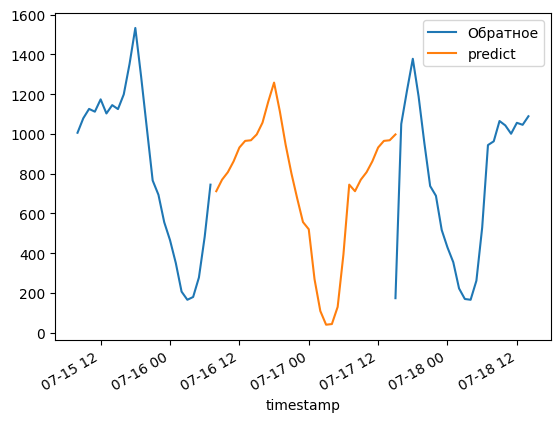

In [359]:
test_col[start-pd.Timedelta(days=1):end+pd.Timedelta(days=1)].plot()

In [308]:
test_col['forecast'] = fit.forecast(int(nan_counts))

ValueError: Length of values (30) does not match length of index (8771)

In [194]:
for row in nan_intervals.itertuples():
    start, end, duration = row.start, row.end, row.duration
    print(start)
    max_train_len = len(test_col[~test_col[title].isna()][:pd.to_datetime(start)])

2024-07-16 07:59:59


KeyError: Timestamp('2024-07-16 07:59:59')

In [ ]:
for name, data_dfs in data_dfs

[('Общая интенсивность автомобилей',
                      Итого Прямое Обратное
  timestamp                                
  2024-01-01 00:59:59   122     57       65
  2024-01-01 01:59:59   261    127      134
  2024-01-01 02:59:59   167     61      106
  2024-01-01 03:59:59   132     59       73
  2024-01-01 04:59:59    92     50       42
  ...                   ...    ...      ...
  2024-12-31 19:59:59   660    376      284
  2024-12-31 20:59:59   490    278      212
  2024-12-31 21:59:59   372    186      186
  2024-12-31 22:59:59   258    128      130
  2024-12-31 23:59:59   101     54       47
  
  [8771 rows x 3 columns]),
 ('Легковые (до 6 м)',
                      Итого Прямое Обратное
  timestamp                                
  2024-01-01 00:59:59   112     51       61
  2024-01-01 01:59:59   252    122      130
  2024-01-01 02:59:59   164     59      105
  2024-01-01 03:59:59   127     58       69
  2024-01-01 04:59:59    85     47       38
  ...                   ...  